# My GitHub Statistics

In [46]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.expand_frame_repr = False

In [47]:
LC = "Lines of Code"

In [48]:
data = pd.read_csv('github.csv')
data.head()

,Repo,Path,File,Lines of Code
0,7_complect,main.py,main.py,30
1,bitcoin_prediction,engine.py,engine.py,111
2,bitcoin_prediction,test.py,test.py,43
3,example-dvc-experiments,src/data_load.py,data_load.py,32
4,example-dvc-experiments,src/data_split.py,data_split.py,37


[Text(0.5, 1.0, 'Distribution of Code')]

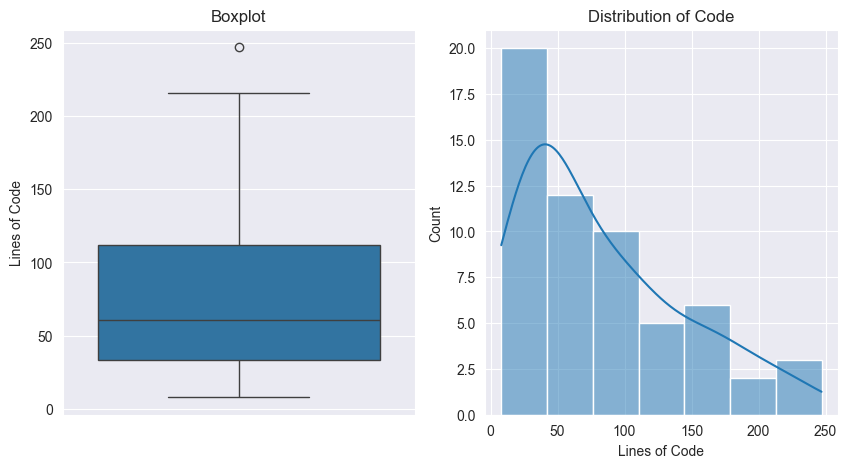

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

b = sns.boxplot(y=data[LC], ax=axs[0])
b.set(title="Boxplot")
h = sns.histplot(data=data, x=LC, kde=True, ax=axs[1])
h.set(xlabel="Lines of Code", ylabel="Count")
h.set(title="Distribution of Code")

In [50]:
print(f'Sample Average == {np.mean(data[LC])}\n'
      f'Sample Variance == {np.var(data[LC], ddof=1)}\n'
      f'Standard deviation == {np.std(data[LC], ddof=1)}\n'
      f'Median value == {np.median(data[LC])}\n'
      f'I-th quartile == {np.percentile(data[LC], 25)}\n'
      f'II-nd quartile == {np.percentile(data[LC], 50)}\n'
      f'III-rd quartile == {np.percentile(data[LC], 75)}\n')

Sample Average == 82.48275862068965
Sample Variance == 3713.0611010284333
Standard deviation == 60.934892311617595
Median value == 61.0
I-th quartile == 33.25
II-nd quartile == 61.0
III-rd quartile == 111.75


In [51]:
df_grouped = data.groupby('Repo')[LC].sum()

pie_fig = px.pie(df_grouped, values=LC, names=df_grouped.index,
             title='Total Code Lines by Repository')
pie_fig.update_traces(textposition='inside')
pie_fig.show()

In [52]:
fig3 = px.scatter(data, x='Repo', y=LC, title='Lines of Code per Repository (Scatter Plot)', hover_data={'File': True, 'Repo': False})
fig3.show()